<h1>Data preparation: Find optimal image size</h1>

In [4]:
#import libraries
import os
import shutil

In [4]:
#copy files into one folder

RootDir1 = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\images\train'
TargetFolder = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein'
for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            SourceFolder = os.path.join(root,name)
            shutil.copy2(SourceFolder, TargetFolder)

In [ ]:
#convert pngs to jpg
from PIL import Image
import os

directory = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein'
c=1
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        im = Image.open(filename)
        name='img'+str(c)+'.jpg'
        rgb_im = im.convert('RGB')
        rgb_im.save(name)
        c+=1
        continue
    else:
        continue

In [17]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

path = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein'

# Get the Image Resolutions
imgs = [img.name for img in Path(path).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(path+ '\\' +f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 16767


,FileName,Size,Width,Height,Aspect Ratio
0,ambulance_1001.jpg,"(150, 200)",150,200,0.75
1,ambulance_1002.jpg,"(150, 200)",150,200,0.75
2,ambulance_1003.jpg,"(150, 200)",150,200,0.75
3,ambulance_1004.jpg,"(150, 200)",150,200,0.75
4,ambulance_1005.jpg,"(150, 200)",150,200,0.75


Text(0, 0.5, 'Height')

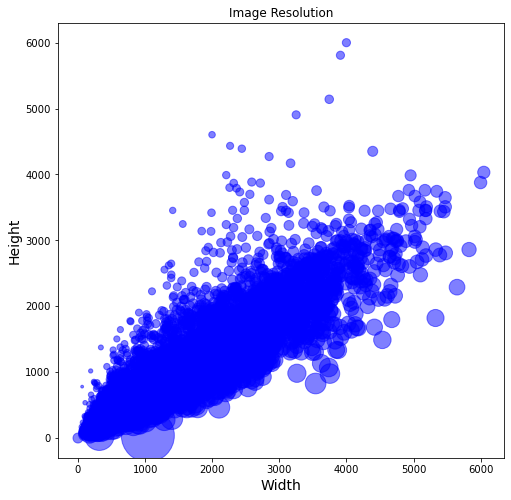

In [18]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

Text(0, 0.5, 'Height')

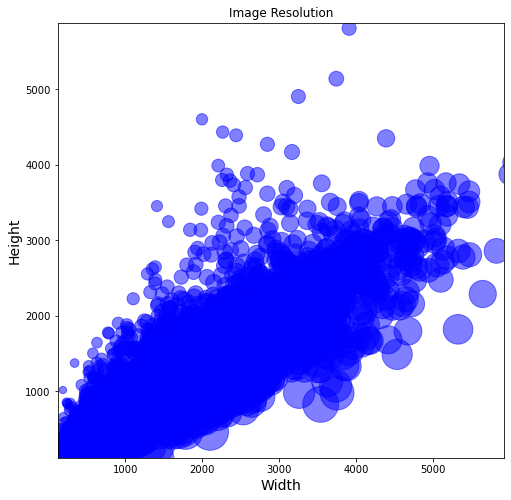

In [26]:
# Visualize Image Resolutions zoomed to find optimal image size

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.margins(x=-0.02, y=-0.02)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*300, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [ ]:
#crop only 100 images per categorie to optimal size
from PIL import Image
import os.path, sys

path = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\trainingdata100'
dirs = os.listdir(path)

def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.resize((150, 200)) 
            imCrop.save(f + ".jpg", "JPEG", quality=80)
            

crop()

In [1]:
#crop all images to optimal size
from PIL import Image
import os.path, sys

path = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein'
dirs = os.listdir(path)

def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            if fullpath != r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein\motorcycle_0': 
                im = Image.open(fullpath)
                f, e = os.path.splitext(fullpath)
                imCrop = im.resize((150, 200)) 
                imCrop.save(f + ".jpg", "JPEG", quality=80)
            

crop()

In [5]:
#zip the images to upload them into cluster

output_filename = "vehicles"
dir_name = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\bilderklein'
shutil.make_archive(output_filename, 'zip', dir_name)

'C:\\Users\\mario\\ZHAW\\Master\\Semester_2_FS22\\Applied_Data_Science\\Projekt\\zhaw_applieddatascience\\vehicles.zip'